In [59]:
import numpy
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [5]:
df.size

10692

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.sample() #gets a random row of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.925,NaN,S


In [8]:
df.columns # see all the columns we have

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [11]:
# the difc in survival rate between male and female
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


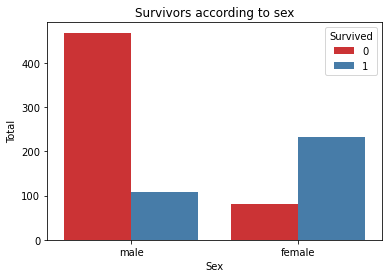

In [13]:
# Visualise a sample data
ax = sns.countplot(x='Sex',hue='Survived',palette='Set1',data=df)
ax.set(title='Survivors according to sex',xlabel='Sex',ylabel='Total')
plt.show()

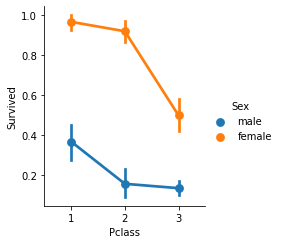

In [14]:
# enables viewing of 3 variables
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=df,aspect=0.9,size=3.5)

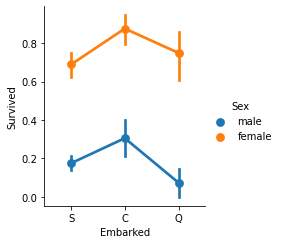

In [15]:
sns.factorplot(x='Embarked',y='Survived',hue='Sex',data=df,aspect=0.9,size=3.5)

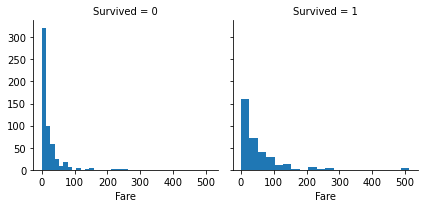

In [16]:
graph = sns.FacetGrid(df, col="Survived")
graph.map(plt.hist, "Fare", bins=20)

In [19]:
df.loc[df["Fare"] > 400, "Fare"] = df["Fare"].median()

In [20]:
# Completing data that is empty and has Null values

# check Null values

for column in df:
    print(column,": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [5]:
# Correct the missing age values. We'll drop the cabin column completely using del df["Cabin"]

df["Age"].fillna(df["Age"].median(), inplace=True)

In [22]:
# check results
for column in df:
    print(column,": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [6]:
# Do same thing for Embarked
# First see whats common in this columns
print(df["Embarked"].value_counts())


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [8]:
# The msot common value from above is S
# Replacing the Null values with the most common value

df["Embarked"].fillna("S", inplace=True)

In [7]:
# check results
for column in df:
    print(column,": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [9]:
# Take data and make use of it.
# Feature engineering is what its called

df['Name'].sample(20) # Lets take a look at a sample of 20 names

685               Laroche, Mr. Joseph Philippe Lemercier
80                                  Waelens, Mr. Achille
106                     Salkjelsvik, Miss. Anna Kristine
394    Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...
865                             Bystrom, Mrs. (Karolina)
693                                     Saad, Mr. Khalil
538                             Risien, Mr. Samuel Beard
435                            Carter, Miss. Lucile Polk
74                                         Bing, Mr. Lee
455                                   Jalsevac, Mr. Ivan
276                    Lindblom, Miss. Augusta Charlotta
185                                Rood, Mr. Hugh Roscoe
263                                Harrison, Mr. William
260                                    Smith, Mr. Thomas
440          Hart, Mrs. Benjamin (Esther Ada Bloomfield)
775              Myhrman, Mr. Pehr Fabian Oliver Malkolm
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
404                            

In [26]:
# create a function to extract the titles
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return "No title in name"

In [24]:
# take the names and map into a set and assign each name a get_title funtion
titles = set([x for x in df.Name.map(lambda x: get_title(x))])

In [34]:
print(titles)

{'Capt', 'Miss', 'Mr', 'Ms', 'the Countess', 'Major', 'Sir', 'Col', 'Rev', 'Mme', 'Master', 'Don', 'Jonkheer', 'Mlle', 'Dr', 'Mrs', 'Lady'}


In [35]:
def shorter_titles(x):
    title = x["Title"]
    if title in ['Capt','Col','Major']:
        return 'Officer'
    elif title in ['Jonkheer','Don','the Countess','Dona','Lady','Sir']:
        return 'Royalty'
    elif title == "Mme":
        return 'Miss'
    elif title in ['Mile','Ms']:
        return 'Miss'
    else:
        return title

In [36]:
# create a Title column
df["Title"] = df['Name'].map(lambda x: get_title(x))

In [37]:
# Apply Shorter_titles function on the new column "Names"

df["Title"] = df.apply(shorter_titles, axis=1)

In [43]:
print(df.Title.value_counts())

Mr         517
Miss       184
Mrs        125
Master      40
Dr           7
Rev          6
Royalty      5
Officer      5
Mlle         2
Name: Title, dtype: int64


In [45]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [49]:
# Remove the Name column

df.drop("Name",axis=1, inplace=True)
# inplace=True means save after running


KeyError: "['Name'] not found in axis"

In [50]:
df.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
239,240,0,2,male,33.00,0,0,SCO/W 1585,12.2750,NaN,S,Mr
760,761,0,3,male,28.00,0,0,358585,14.5000,NaN,S,Mr
114,115,0,3,female,17.00,0,0,2627,14.4583,NaN,C,Miss
275,276,1,1,female,63.00,1,0,13502,77.9583,D7,S,Miss
98,99,1,2,female,34.00,0,1,231919,23.0000,NaN,S,Mrs
153,154,0,3,male,40.50,0,2,A/5. 851,14.5000,NaN,S,Mr
170,171,0,1,male,61.00,0,0,111240,33.5000,B19,S,Mr
161,162,1,2,female,40.00,0,0,C.A. 33595,15.7500,NaN,S,Mrs
16,17,0,3,male,2.00,4,1,382652,29.1250,NaN,Q,Master
52,53,1,1,female,49.00,1,0,PC 17572,76.7292,D33,C,Mrs


In [51]:
"""Coverting the data into numbers.
To plug into a machine learning model.
 Examle: Female/male into 0 and 1s.

 Why? ML models needs info in form of numbers.

"""
 #Remove the ticket colum as its not usefull for this purpose
df.drop("Ticket",axis=1, inplace=True)

In [52]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
111,112,0,3,female,14.5,1,0,14.4542,NaN,C,Miss
198,199,1,3,female,28.0,0,0,7.7500,NaN,Q,Miss
298,299,1,1,male,28.0,0,0,30.5000,C106,S,Mr
582,583,0,2,male,54.0,0,0,26.0000,NaN,S,Mr
190,191,1,2,female,32.0,0,0,13.0000,NaN,S,Mrs
290,291,1,1,female,26.0,0,0,78.8500,NaN,S,Miss
637,638,0,2,male,31.0,1,1,26.2500,NaN,S,Mr
653,654,1,3,female,28.0,0,0,7.8292,NaN,Q,Miss
765,766,1,1,female,51.0,1,0,77.9583,D11,S,Mrs
762,763,1,3,male,20.0,0,0,7.2292,NaN,C,Mr


In [57]:
# New we need to convert Sex, Embarked, & Title into values

df.Sex.replace(('male','female'), (0,1), inplace=True)
df.Embarked.replace(('S','C','Q'), (0,1,2), inplace=True)
df.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace=True)

In [55]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df.Title.value_counts()

Mr         517
Miss       184
Mrs        125
Master      40
Dr           7
Rev          6
Royalty      5
Officer      5
Mlle         2
Name: Title, dtype: int64

In [58]:
df.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
50,51,0,3,0,7.0,4,1,39.6875,NaN,0,3
164,165,0,3,0,1.0,4,1,39.6875,NaN,0,3
211,212,1,2,1,35.0,0,0,21.0000,NaN,0,1
62,63,0,1,0,45.0,1,0,83.4750,C83,0,0
143,144,0,3,0,19.0,0,0,6.7500,NaN,2,0
446,447,1,2,1,13.0,0,1,19.5000,NaN,0,1
465,466,0,3,0,38.0,0,0,7.0500,NaN,0,0
237,238,1,2,1,8.0,0,2,26.2500,NaN,0,1
328,329,1,3,1,31.0,1,1,20.5250,NaN,0,2
775,776,0,3,0,18.0,0,0,7.7500,NaN,0,0
